**DISCLAIMER: This notebook was borrowed from Baligh Mnassri who had made this great submission on Kaggle. We have made some edits here and there, hopefully in a way that is easy to comprehend. For the original notebook, check out the link below!**
https://www.kaggle.com/mnassrib/titanic-logistic-regression-with-python

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
import sys
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

import warnings
warnings.simplefilter(action='ignore')

# %load_ext autoreload
# %autoreload 2
# %matplotlib inline

In [ ]:
# Inserting the path to where the datasets are
folder = "/content/drive/xxx/"
sys.path.append(folder)

folder1 = "/content/drive/xxx/"
sys.path.append(folder1)

###Some preliminary understanding with *advertising.csv* dataset


In [ ]:
train_data = pd.read_csv(folder1+"advertising.csv")
train_data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [ ]:
print(train_data['TV'].values.shape)
print(train_data['TV'].values.reshape(-1,1).shape)

(200,)
(200, 1)


In [ ]:
from sklearn.linear_model import LinearRegression

X = train_data['TV'].values.reshape(-1,1)
y = train_data['Sales'].values.reshape(-1,1)
reg = LinearRegression()
reg.fit(X, y)
pred = reg.predict(X)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

The linear model is: Y = 6.9748 + 0.055465X


In [ ]:
from sklearn.linear_model import LogisticRegression

train_data['Sales_cat']=np.where(train_data["Sales"]<15, 0, 1)
print(train_data.head())

logreg = LogisticRegression(C=1e9)
feature = 'TV'

X = train_data[feature].values.reshape(-1,1)
y = train_data['Sales_cat'].values.reshape(-1,1)
logreg.fit(X, y)
print((feature, logreg.coef_[0][0]))
print("The logistic regression model is: Y = {:.5} + {:.5}X".format(logreg.intercept_[0], logreg.coef_[0][0]))

      TV  Radio  Newspaper  Sales  Sales_cat
0  230.1   37.8       69.2   22.1          1
1   44.5   39.3       45.1   10.4          0
2   17.2   45.9       69.3   12.0          0
3  151.5   41.3       58.5   16.5          1
4  180.8   10.8       58.4   17.9          1


LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

('TV', 0.0691770253714557)
The logistic regression model is: Y = -9.4382 + 0.069177X


Interpretation: 1 unit increase in 'TV' is associated with a 0.069 unit increase in the log-odds of 'sales_cat'.

In [ ]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


#Implementing a logistic regression model for binary classification with Titanic Dataset

In [ ]:
# Read CSV train data file into DataFrame
train_df = pd.read_csv(folder+"data/train.csv")

# # Read CSV test data file into DataFrame
# test_df = pd.read_csv(folder+"data/test.csv")

# preview train data
train_df.head()
print("The dataset has {} observations and {} features".format(train_df.shape[0], train_df.shape[1]))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset has 891 observations and 12 features


###Missing Value Imputation

In [ ]:
# Find percentage of missing values for each attribute
(train_df.isnull().sum()/len(train_df)).apply(lambda x:'{:.2%}'.format(x))

PassengerId     0.00%
Survived        0.00%
Pclass          0.00%
Name            0.00%
Sex             0.00%
Age            19.87%
SibSp           0.00%
Parch           0.00%
Ticket          0.00%
Fare            0.00%
Cabin          77.10%
Embarked        0.22%
dtype: object

[Text(0.5, 0, 'Age')]

(-10.0, 85.0)

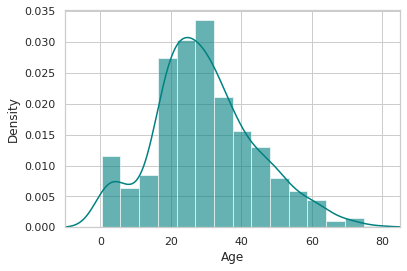

In [ ]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [ ]:
# mean age
print('The mean of "Age" is %.2f' %(train_df["Age"].mean(skipna=True)))
# median age
print('The median of "Age" is %.2f' %(train_df["Age"].median(skipna=True)))


The mean of "Age" is 29.70
The median of "Age" is 28.00


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


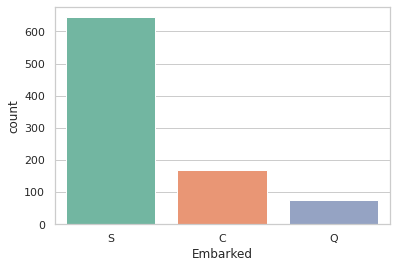

The most common boarding port of embarkation is S.


In [ ]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train_df['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train_df, palette='Set2')
plt.show()

print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

In [ ]:
# Imputing missing values in column 'Age' with median (and not mean since it is right skewed), and in column 'Embarked' with the mode
# Dropping the feature Cabin as it has too many missing values

train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

In [ ]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


###Some exploratory analysis

<Figure size 576x360 with 0 Axes>

[Text(0.5, 0, 'Age')]

(-10.0, 85.0)

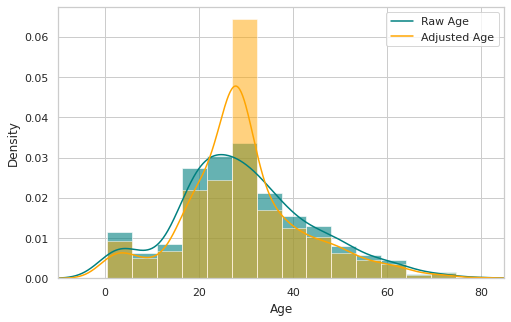

In [ ]:
plt.figure(figsize=(8,5))
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()


In [ ]:
## Create categorical variable for traveling alone
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [ ]:
#create categorical variables and drop some variables
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])

training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Density Plot of Age for Surviving Population and Deceased Population')

[Text(0.5, 0, 'Age')]

(-10.0, 85.0)

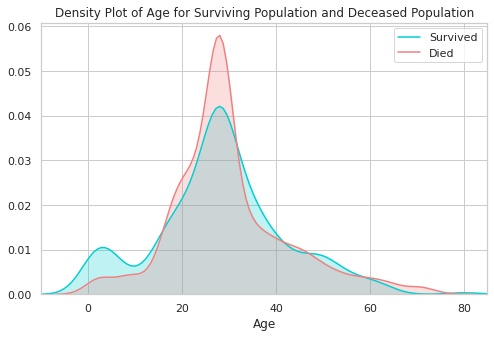

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.kdeplot(final_train["Age"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Age"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

Children seem more likely to survive 

---
Creating a minor flag



In [ ]:
final_train['IsMinor']=np.where(final_train['Age']<=16, 1, 0)

<Figure size 576x360 with 0 Axes>

Text(0.5, 1.0, 'Density Plot of Fare for Surviving Population and Deceased Population')

[Text(0.5, 0, 'Fare')]

(-20.0, 200.0)

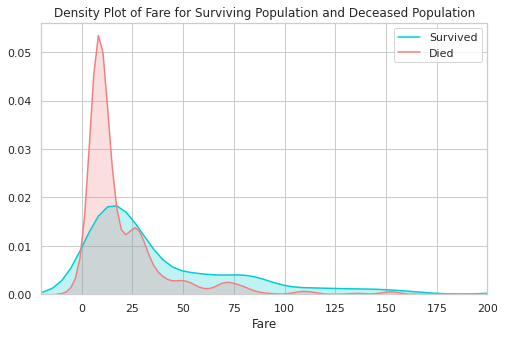

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.kdeplot(final_train["Fare"][final_train.Survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final_train["Fare"][final_train.Survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

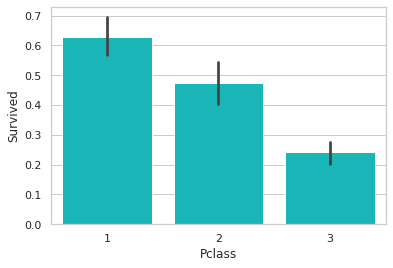

In [ ]:
sns.barplot('Pclass', 'Survived', data=train_df, color="darkturquoise")
plt.show()

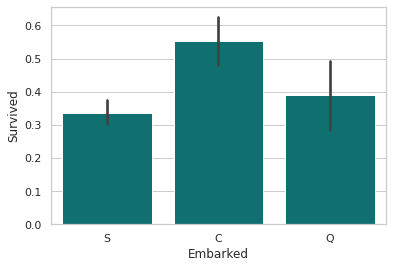

In [ ]:
sns.barplot('Embarked', 'Survived', data=train_df, color="teal")
plt.show()

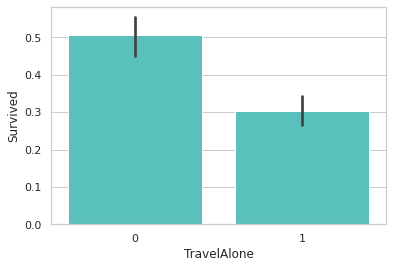

In [ ]:
sns.barplot('TravelAlone', 'Survived', data=final_train, color="mediumturquoise")
plt.show()

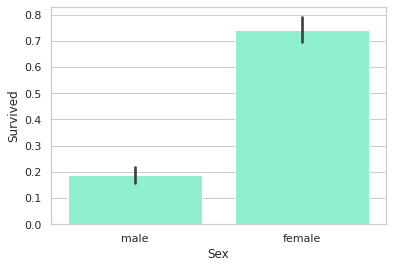

In [ ]:
sns.barplot('Sex', 'Survived', data=train_df, color="aquamarine")
plt.show()

*We are going to skip standardisaton and normalisation here, as we have only 2 numerical continuous variables. These steps for a classification problem would help in faster convergence, and the model performance should not suffer as such.*

###Checking collinearity

(<Figure size 576x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f20a4dac8d0>)

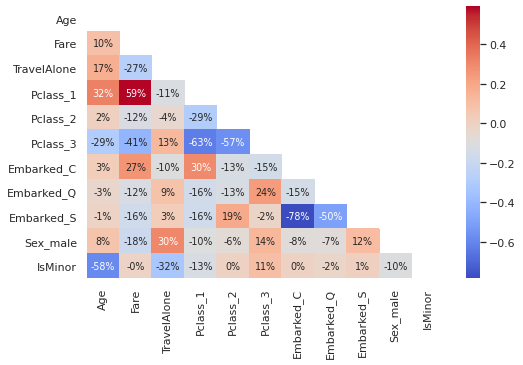

In [ ]:
plt.subplots(figsize=(8, 5))
matrix = np.triu(final_train.iloc[:,1:12].corr())

sns.heatmap(final_train.iloc[:,1:12].corr(), annot=True, cmap="coolwarm", fmt = '.0%', annot_kws={"size": 9.5}, mask=matrix)
plt.show()

###Fitting the logistic model (finally!)

In [ ]:
from sklearn.linear_model import LogisticRegression
# from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S", "Sex_male","IsMinor"] 

# create X (features) and y (response)
X = final_train[cols]
y = final_train['Survived']

### Iter (a) : Train/test split (70:30)

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

###Evaluation metrics

Text(0.5, 12.5, 'Predicted labels')

Text(30.5, 0.5, 'True labels')

Text(0.5, 1.0, 'Confusion matrix')

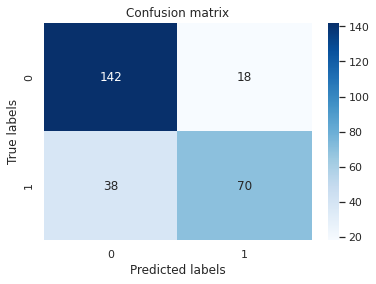

In [ ]:
ax = plt.subplot()
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, ax= ax, fmt = 'd', cmap = 'Blues')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title("Confusion matrix")

Accuracy for the trained model: 0.7910

Precision for the trained model: 0.7955

Recall for the trained model: 0.6481

F1 score for the trained model: 0.7143 



Text(0.5, 1.0, 'Receiver Operating Characteristic')

Text(0.5, 0, 'False Positive Rate (1 - specificity)')

Text(0, 0.5, 'True Positive Rate (recall)')

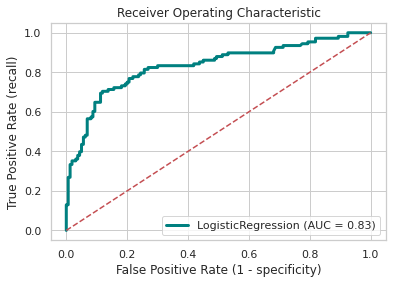

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
from sklearn.metrics import f1_score,recall_score,precision_score,plot_roc_curve

print("Accuracy for the trained model: %.4f" % accuracy_score(y_test,y_pred))
print("\nPrecision for the trained model: %.4f" % precision_score(y_test,y_pred))
print("\nRecall for the trained model: %.4f" % recall_score(y_test,y_pred))
print("\nF1 score for the trained model: %.4f \n" % f1_score(y_test,y_pred))

ax = plt.subplot()
plot_roc_curve(logreg, X_test, y_test, ax = ax, color='teal', linewidth = 3)
ax.set_title('Receiver Operating Characteristic')
ax.set_xlabel('False Positive Rate (1 - specificity)')
ax.set_ylabel('True Positive Rate (recall)')
plt.plot([0, 1], [0, 1], 'k--',color = 'r')
plt.show()

### Iter (b) : k-fold Cross validation
---
Basically doing a bunch of train/test splits and averaging out the scores


In [ ]:
#10-fold cross-validation logistic regression
logreg = LogisticRegression()

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the data
# cv=10 for 10 folds
# scoring = {'accuracy', 'neg_log_loss', 'roc_auc'} for evaluation metric - although they are many

scores_accuracy = cross_val_score(logreg, X, y, cv=10, scoring='accuracy')
scores_log_loss = cross_val_score(logreg, X, y, cv=10, scoring='neg_log_loss')
scores_auc = cross_val_score(logreg, X, y, cv=10, scoring='roc_auc')
print('K-FOLD CROSS VALIDATON RESULTS \n')

print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

K-FOLD CROSS VALIDATON RESULTS 

LogisticRegression average accuracy is 0.790
LogisticRegression average log_loss is 0.456
LogisticRegression average auc is 0.847


### Iter (c) : RFE - Feature importance analysis
---
Running a feature importance analysis for feature selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_S","Embarked_C", "Sex_male","IsMinor"] 
X = final_train[cols]
y = final_train['Survived']

# Build a logreg and compute the feature importances
model = LogisticRegression()
model.fit(X,y)
# create the RFE model and select 8 attributes
rfe = RFE(model, 8)
rfe = rfe.fit(X, y)
# summarize the selection of }the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected_features=X.columns[rfe.support_]
# create X (features) and y (response)
X = final_train[Selected_features]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

print(logreg.__class__.__name__+" average accuracy is %2.3f" % scores_accuracy.mean())
print(logreg.__class__.__name__+" average log_loss is %2.3f" % -scores_log_loss.mean())
print(logreg.__class__.__name__+" average auc is %2.3f" % scores_auc.mean())

Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_S', 'Embarked_C', 'Sex_male', 'IsMinor']
LogisticRegression average accuracy is 0.790
LogisticRegression average log_loss is 0.456
LogisticRegression average auc is 0.847


Optimal number of features: 8
Selected features: ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_S', 'Embarked_C', 'Sex_male', 'IsMinor']


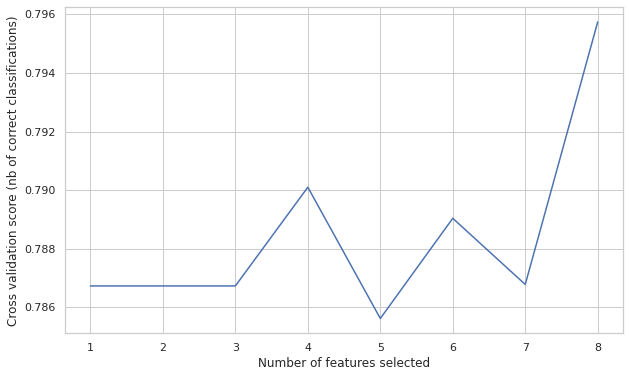

In [ ]:
from sklearn.feature_selection import RFECV
# Create the RFE object and compute a cross-validated score.
# The "accuracy" scoring is proportional to the number of correct classifications
rfecv = RFECV(estimator=LogisticRegression(), step=1, cv=10, scoring='accuracy')
rfecv.fit(X, y)

print("Optimal number of features: %d" % rfecv.n_features_)
print('Selected features: %s' % list(X.columns[rfecv.support_]))

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

Advantages of logistic regression:

    Highly interpretable (if you remember how)
    Model training and prediction are fast
    No tuning is required (excluding regularization)
    Features don't need scaling
    Can perform well with a small number of observations
    Outputs well-calibrated predicted probabilities

Disadvantages of logistic regression:

    Presumes a linear relationship between the features and the log-odds of the response
    Performance is (generally) not competitive with the best supervised learning methods
    Can't automatically learn feature interactions


###Additional Reading
---
* Maximum Likelihood estimation: https://machinelearningmastery.com/logistic-regression-with-maximum-likelihood-estimation/
* Gradient Descent: https://blog.paperspace.com/tag/series-optimization/

* Evaluation Metrics: https://towardsdatascience.com/the-5-classification-evaluation-metrics-you-must-know-aa97784ff226
* RFE :https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html
* RFECV: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html
